
--- Funnel Cake Sales Table (MA(1)) ---
    Month   Error_t  Error_t-1  Sales (Xt)
0       1 -0.138264   0.496714   10.110093
1       2  0.647689  -0.138264   10.578556
2       3  1.523030   0.647689   11.846874
3       4 -0.234153   1.523030   10.527362
4       5 -0.234137  -0.234153    9.648786
5       6  1.579213  -0.234137   11.462144
6       7  0.767435   1.579213   11.557041
7       8 -0.469474   0.767435    9.914243
8       9  0.542560  -0.469474   10.307823
9      10 -0.463418   0.542560    9.807862
10     11 -0.465730  -0.463418    9.302561
11     12  0.241962  -0.465730   10.009097


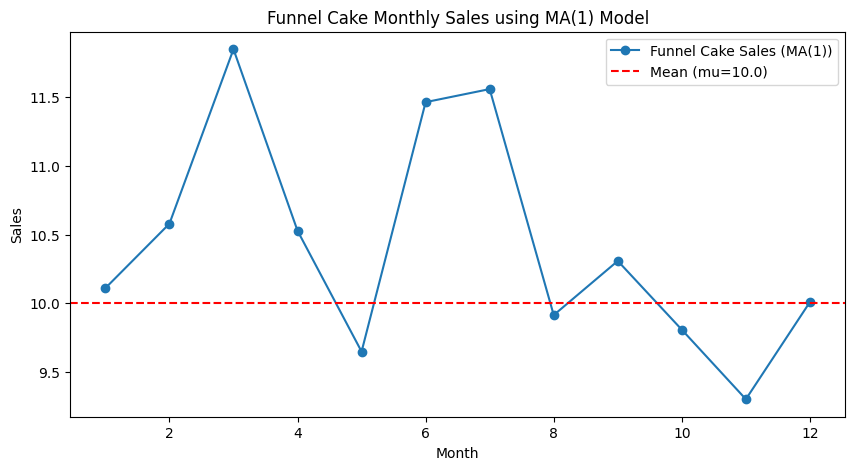

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mu = float(input("Enter mean value (mu): "))
phi = float(input("Enter MA coefficient (phi): "))
n_periods = 12  # 1 year of monthly sales

np.random.seed(42)
errors = np.random.normal(0, 1, n_periods+1)  

# --- 3. Implement MA(1) Model ---
funnel_cakes = []
for t in range(1, n_periods+1):
    xt = mu + phi * errors[t-1] + errors[t]   # MA(1) formula
    funnel_cakes.append(xt)

# --- 4. Table ---
months = np.arange(1, n_periods+1)
df = pd.DataFrame({
    "Month": months,
    "Error_t": errors[1:n_periods+1],
    "Error_t-1": errors[0:n_periods],
    "Sales (Xt)": funnel_cakes
})

print("\n--- Funnel Cake Sales Table (MA(1)) ---")
print(df)

# --- 5. Visualization ---
plt.figure(figsize=(10,5))
plt.plot(months, funnel_cakes, marker='o', label="Funnel Cake Sales (MA(1))")
plt.axhline(mu, color='red', linestyle='--', label=f"Mean (mu={mu})")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Funnel Cake Monthly Sales using MA(1) Model")
plt.legend()
plt.show()



--- MA(2) Process Table ---
    Month    ε_t  ε_t-1  ε_t-2  phi1*ε_t-1  phi2*ε_t-2     X_t
0       1  0.648 -0.138  0.497      -0.069       0.298  10.877
1       2  1.523  0.648 -0.138       0.324      -0.083  11.764
2       3 -0.234  1.523  0.648       0.762       0.389  10.916
3       4 -0.234 -0.234  1.523      -0.117       0.914  10.563
4       5  1.579 -0.234 -0.234      -0.117      -0.140  11.322
5       6  0.767  1.579 -0.234       0.790      -0.140  11.417
6       7 -0.469  0.767  1.579       0.384       0.948  10.862
7       8  0.543 -0.469  0.767      -0.235       0.460  10.768
8       9 -0.463  0.543 -0.469       0.271      -0.282   9.526
9      10 -0.466 -0.463  0.543      -0.232       0.326   9.628
10     11  0.242 -0.466 -0.463      -0.233      -0.278   9.731
11     12 -1.913  0.242 -0.466       0.121      -0.279   7.928


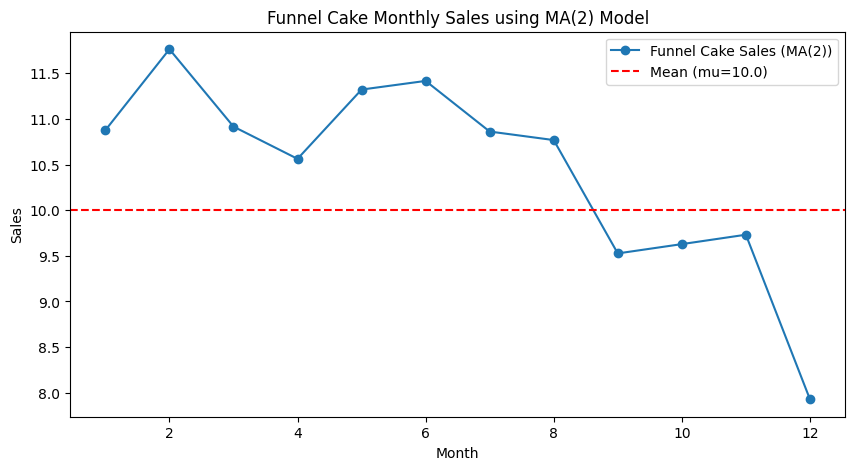

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mu = float(input("Enter mean value (mu): "))
phi1 = float(input("Enter coefficient phi1: "))
phi2 = float(input("Enter coefficient phi2: "))
n_periods = 12  # 1 year of monthly sales

np.random.seed(42)
errors = np.random.normal(0, 1, n_periods+2)  # need extra for lagged terms

# --- 3. Implement MA(2) ---
records = []
funnel_cakes = []

for t in range(2, n_periods+2):
    lag1 = errors[t-1]
    lag2 = errors[t-2]
    current_error = errors[t]
    
    xt = mu + phi1*lag1 + phi2*lag2 + current_error
    funnel_cakes.append(xt)
    
    records.append({
        "Month": t-1,
        "ε_t": round(current_error, 3),
        "ε_t-1": round(lag1, 3),
        "ε_t-2": round(lag2, 3),
        "phi1*ε_t-1": round(phi1*lag1, 3),
        "phi2*ε_t-2": round(phi2*lag2, 3),
        "X_t": round(xt, 3)
    })

# --- 4. Table ---
df = pd.DataFrame(records)
print("\n--- MA(2) Process Table ---")
print(df)

# --- 5. Visualization ---
months = np.arange(1, n_periods+1)
plt.figure(figsize=(10,5))
plt.plot(months, funnel_cakes, marker='o', label="Funnel Cake Sales (MA(2))")
plt.axhline(mu, color='red', linestyle='--', label=f"Mean (mu={mu})")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Funnel Cake Monthly Sales using MA(2) Model")
plt.legend()
plt.show()

